In [30]:
import matplotlib.pyplot as plt
import numpy as np

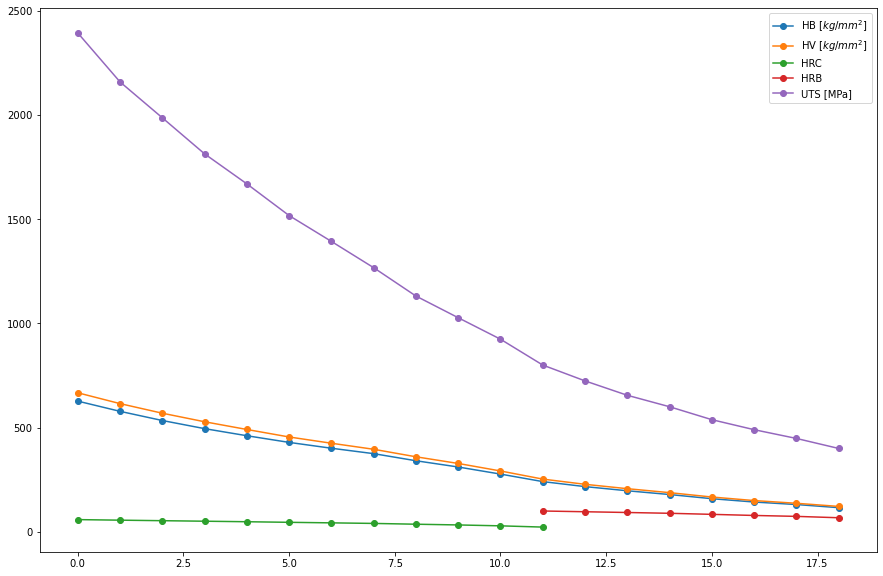

In [7]:
# Table 3

HB = [627, 578, 534, 495, 461, 429, 401, 375, 341, 311, 277, 241, 217, 197, 179, 159, 143, 131, 116]
HV = [667, 615, 569, 528, 491, 455, 425, 396, 360, 328, 292, 253, 228, 207, 188, 167, 150, 137, 122]
HRC = [58.7, 56, 53.5, 51, 48.5, 45.7, 43.1, 40.4, 36.6, 33.1, 28.8, 22.8]
HRB = [100, 96.4, 92.8, 89, 83.9, 78.6, 74.2, 67.6]
UTS = [2393, 2158, 1986, 1813, 1669, 1517, 1393, 1267, 1131, 1027, 924, 800, 724, 655, 600, 538, 490, 448, 400]

x = list(range(len(HB)))

plt.figure(figsize = (15, 10))

plt.plot(x, HB, marker = 'o', label = 'HB [$kg/mm^2$]')
plt.plot(x, HV, marker = 'o', label = 'HV [$kg/mm^2$]')
plt.plot(list(range(len(HRC))), HRC, marker = 'o', label = 'HRC')
plt.plot(x[-len(HRB):], HRB, marker = 'o', label = 'HRB')
plt.plot(x, UTS, marker = 'o', label = 'UTS [MPa]')


# Experimental data


plt.legend()

In [39]:
a = [1,2,3, 4, 5, 6, 7, 8]
a[-2:]

[7, 8]

In [85]:
HRC_ext

array([23.15151515, 20.06969697, 16.98787879, 13.90606061, 10.82424242,
        7.74242424,  4.66060606])

In [74]:
HRB = [100, 96.4, 92.8, 89, 83.9, 78.6, 74.2, 67.6]

x = list(range(19))
poly = np.poly1d(np.polyfit(x[-8:], HRB, 1))
HRB_ext = poly(x[:11])
HRB_extended = np.concatenate((HRB_ext, HRB))

HRB_extended

array([151.85714286, 147.26785714, 142.67857143, 138.08928571,
       133.5       , 128.91071429, 124.32142857, 119.73214286,
       115.14285714, 110.55357143, 105.96428571, 100.        ,
        96.4       ,  92.8       ,  89.        ,  83.9       ,
        78.6       ,  74.2       ,  67.6       ])

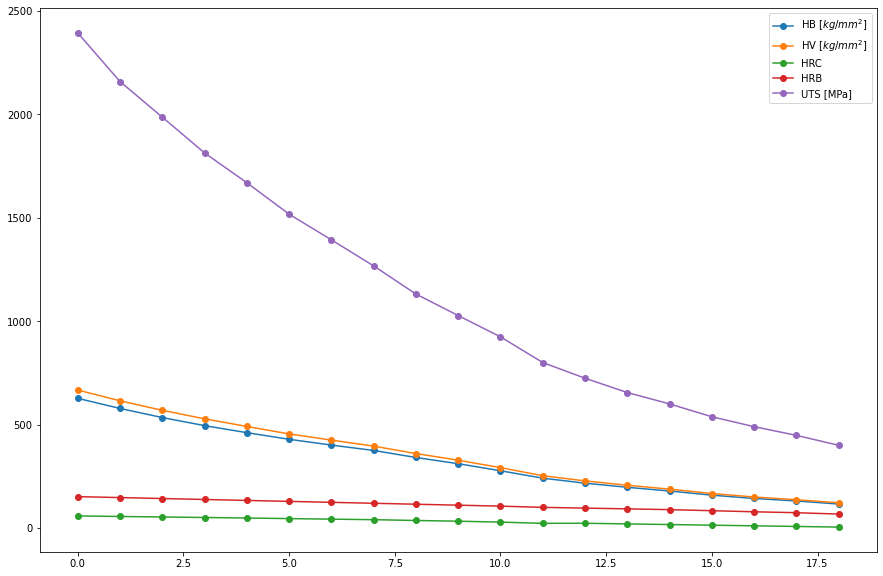

In [76]:
# Table 3

HB = [627, 578, 534, 495, 461, 429, 401, 375, 341, 311, 277, 241, 217, 197, 179, 159, 143, 131, 116]
HV = [667, 615, 569, 528, 491, 455, 425, 396, 360, 328, 292, 253, 228, 207, 188, 167, 150, 137, 122]

HRC = [58.7, 56, 53.5, 51, 48.5, 45.7, 43.1, 40.4, 36.6, 33.1, 28.8, 22.8]

x = list(range(19))
poly = np.poly1d(np.polyfit(x[:12], HRC, 1))
HRC_ext = poly(x[12:])
HRC_extended = np.concatenate((HRC, HRC_ext))

HRC = HRC_extended

HRB = [100, 96.4, 92.8, 89, 83.9, 78.6, 74.2, 67.6]

x = list(range(19))
poly = np.poly1d(np.polyfit(x[-8:], HRB, 1))
HRB_ext = poly(x[:11])
HRB_extended = np.concatenate((HRB_ext, HRB))

HRB = HRB_extended

UTS = [2393, 2158, 1986, 1813, 1669, 1517, 1393, 1267, 1131, 1027, 924, 800, 724, 655, 600, 538, 490, 448, 400]


plt.figure(figsize = (15, 10))

plt.plot(x, HB, marker = 'o', label = 'HB [$kg/mm^2$]')
plt.plot(x, HV, marker = 'o', label = 'HV [$kg/mm^2$]')
plt.plot(x, HRC_extended, marker = 'o', label = 'HRC')
plt.plot(x, HRB_extended, marker = 'o', label = 'HRB')
plt.plot(x, UTS, marker = 'o', label = 'UTS [MPa]')


plt.legend()

# 1045

In [80]:
# Steel 1045 CD

# 1. Rockwell -> Estimating Brinell and Vickers

HR_E = 20.76

for i in range(len(HRC)):
    if HR_E > HRC[0]:
        ratio = (HR_E - HRC[0])/(HRC[1] - HRC[0])
        HB_n = [HB[0], HB[1]]
        HV_n = [HV[0], HV[1]]
        idx = i
        break
    elif HRC[i+1] < HR_E < HRC[i]:
        # perform interpolation
        ratio = (HR_E - HRC[i])/(HRC[i+1] - HRC[i])
        HB_n = [HB[i], HB[i+1]]
        HV_n = [HV[i], HV[i+1]]
        idx = i
        break
    elif HRC[-1] > HR_E:
        ratio = (HR_E - HRC[-2])/(HRC[-1] - HRC[-2])
        HB_n = [HB[len(HRC)-2], HB[len(HRC)-1]]
        HV_n = [HV[len(HRC)-2], HV[len(HRC)-1]]
        idx = i
        break
        
HB_P = HB_n[0] + ratio*(HB_n[1] - HB_n[0])
HV_P = HV_n[0] + ratio*(HV_n[1] - HV_n[0])

print("From ROCKWELL")
print("HB_P : {:.2f}, HV_P : {:.2f}".format(HB_P, HV_P))
print('='*50)

# 2. Brinell -> Estimating Vickers and Rockwell

HB_E = 244.62

for i in range(len(HRC)):
    if HB[i+1] < HB_E < HB[i]:
        # perform interpolation
        ratio = (HB_E - HB[i])/(HB[i+1] - HB[i])
        HRC_n = [HRC[i], HRC[i+1]]
        HRB_n = [HRB[i], HRB[i+1]]
        HV_n = [HV[i], HV[i+1]]
        idx = i
        break

HRC_P = HRC_n[0] + ratio*(HRC_n[1] - HRC_n[0])
HRB_P = HRB_n[0] + ratio*(HRB_n[1] - HRB_n[0])
HV_P = HV_n[0] + ratio*(HV_n[1] - HV_n[0])

print("From BRINELL")
print("HRC_P : {:.2f}, HRB_P : {:.2f}, HV_P : {:.2f}".format(HRC_P, HRB_P, HV_P))
print('='*50)

# 3. Vickers -> Estimating Brinell and Rockwell

HV_E = 244.62

for i in range(len(HRC)):
    if HV[i+1] < HV_E < HV[i]:
        # perform interpolation
        ratio = (HV_E - HV[i])/(HV[i+1] - HV[i])
        HRC_n = [HRC[i], HRC[i+1]]
        HRB_n = [HRB[i], HRB[i+1]]
        HB_n = [HB[i], HB[i+1]]
        idx = i
        break

HRC_P = HRC_n[0] + ratio*(HRC_n[1] - HRC_n[0])
HRB_P = HRB_n[0] + ratio*(HRB_n[1] - HRB_n[0])
HB_P = HB_n[0] + ratio*(HB_n[1] - HB_n[0])

print("From Vickers")
print("HRC_P : {:.2f}, HRB_P : {:.2f}, HB_P : {:.2f}".format(HRC_P, HRB_P, HB_P))
print('='*50)

From ROCKWELL
HB_P : 201.48, HV_P : 211.70
From BRINELL
HRC_P : 23.40, HRB_P : 100.60, HV_P : 256.92
From Vickers
HRC_P : 22.92, HRB_P : 98.79, HB_P : 232.96


# 1018

In [82]:
# Steel 1018 CD : HRB

# 1. Rockwell -> Estimating Brinell and Vickers

HR_E = 92.47

for i in range(len(HRB)):
    if HRB[i+1] < HR_E < HRB[i]:
        # perform interpolation
        ratio = (HR_E - HRB[i])/(HRB[i+1] - HRB[i])
        HB_n = [HB[i], HB[i+1]]
        HV_n = [HV[i], HV[i+1]]
        idx = i
        break
        
HB_P = HB_n[0] + ratio*(HB_n[1] - HB_n[0])
HV_P = HV_n[0] + ratio*(HV_n[1] - HV_n[0])

print("From ROCKWELL")
print("HB_P : {:.2f}, HV_P : {:.2f}".format(HB_P, HV_P))
print('='*50)

# 2. Brinell -> Estimating Vickers and Rockwell

HB_E = 191.06

for i in range(len(HRC)):
    if HB[i+1] < HB_E < HB[i]:
        # perform interpolation
        ratio = (HB_E - HB[i])/(HB[i+1] - HB[i])
        HRC_n = [HRC[i], HRC[i+1]]
        HRB_n = [HRB[i], HRB[i+1]]
        HV_n = [HV[i], HV[i+1]]
        idx = i
        break

HRC_P = HRC_n[0] + ratio*(HRC_n[1] - HRC_n[0])
HRB_P = HRB_n[0] + ratio*(HRB_n[1] - HRB_n[0])
HV_P = HV_n[0] + ratio*(HV_n[1] - HV_n[0])

print("From BRINELL")
print("HRC_P : {:.2f}, HRB_P : {:.2f}, HV_P : {:.2f}".format(HRC_P, HRB_P, HV_P))
print('='*50)

# 3. Vickers -> Estimating Brinell and Rockwell

HV_E = 207.74

for i in range(len(HRC)):
    if HV[i+1] < HV_E < HV[i]:
        # perform interpolation
        ratio = (HV_E - HV[i])/(HV[i+1] - HV[i])
        HRC_n = [HRC[i], HRC[i+1]]
        HRB_n = [HRB[i], HRB[i+1]]
        HB_n = [HB[i], HB[i+1]]
        idx = i
        break

HRC_P = HRC_n[0] + ratio*(HRC_n[1] - HRC_n[0])
HRB_P = HRB_n[0] + ratio*(HRB_n[1] - HRB_n[0])
HB_P = HB_n[0] + ratio*(HB_n[1] - HB_n[0])

print("From Vickers")
print("HRC_P : {:.2f}, HRB_P : {:.2f}, HB_P : {:.2f}".format(HRC_P, HRB_P, HB_P))
print('='*50)

From ROCKWELL
HB_P : 195.44, HV_P : 205.35
From BRINELL
HRC_P : 19.05, HRB_P : 91.55, HV_P : 200.73
From Vickers
HRC_P : 20.18, HRB_P : 92.93, HB_P : 197.70


In [83]:
# Steel 1018 HR : HRB

# 1. Rockwell -> Estimating Brinell and Vickers

HR_E = 82.41

for i in range(len(HRB)):
    if HRB[i+1] < HR_E < HRB[i]:
        # perform interpolation
        ratio = (HR_E - HRB[i])/(HRB[i+1] - HRB[i])
        HB_n = [HB[i], HB[i+1]]
        HV_n = [HV[i], HV[i+1]]
        idx = i
        break
        
HB_P = HB_n[0] + ratio*(HB_n[1] - HB_n[0])
HV_P = HV_n[0] + ratio*(HV_n[1] - HV_n[0])

print("From ROCKWELL")
print("HB_P : {:.2f}, HV_P : {:.2f}".format(HB_P, HV_P))
print('='*50)

# 2. Brinell -> Estimating Vickers and Rockwell

HB_E = 154.47

for i in range(len(HRC)):
    if HB[i+1] < HB_E < HB[i]:
        # perform interpolation
        ratio = (HB_E - HB[i])/(HB[i+1] - HB[i])
        HRC_n = [HRC[i], HRC[i+1]]
        HRB_n = [HRB[i], HRB[i+1]]
        HV_n = [HV[i], HV[i+1]]
        idx = i
        break

HRC_P = HRC_n[0] + ratio*(HRC_n[1] - HRC_n[0])
HRB_P = HRB_n[0] + ratio*(HRB_n[1] - HRB_n[0])
HV_P = HV_n[0] + ratio*(HV_n[1] - HV_n[0])

print("From BRINELL")
print("HRC_P : {:.2f}, HRB_P : {:.2f}, HV_P : {:.2f}".format(HRC_P, HRB_P, HV_P))
print('='*50)

# 3. Vickers -> Estimating Brinell and Rockwell

HV_E = 166.84

for i in range(len(HRC)):
    if HV[i+1] < HV_E < HV[i]:
        # perform interpolation
        ratio = (HV_E - HV[i])/(HV[i+1] - HV[i])
        HRC_n = [HRC[i], HRC[i+1]]
        HRB_n = [HRB[i], HRB[i+1]]
        HB_n = [HB[i], HB[i+1]]
        idx = i
        break

HRC_P = HRC_n[0] + ratio*(HRC_n[1] - HRC_n[0])
HRB_P = HRB_n[0] + ratio*(HRB_n[1] - HRB_n[0])
HB_P = HB_n[0] + ratio*(HB_n[1] - HB_n[0])

print("From Vickers")
print("HRC_P : {:.2f}, HRB_P : {:.2f}, HB_P : {:.2f}".format(HRC_P, HRB_P, HB_P))
print('='*50)

From ROCKWELL
HB_P : 154.50, HV_P : 162.22
From BRINELL
HRC_P : 13.03, HRB_P : 82.40, HV_P : 162.19
From Vickers
HRC_P : 13.88, HRB_P : 83.85, HB_P : 158.85


# 4140 HT

In [84]:
# Steel 4140 HT

# 1. Rockwell -> Estimating Brinell and Vickers

HR_E = 34.69

for i in range(len(HRC)):
    if HR_E > HRC[0]:
        ratio = (HR_E - HRC[0])/(HRC[1] - HRC[0])
        HB_n = [HB[0], HB[1]]
        HV_n = [HV[0], HV[1]]
        idx = i
        break
    elif HRC[i+1] < HR_E < HRC[i]:
        # perform interpolation
        ratio = (HR_E - HRC[i])/(HRC[i+1] - HRC[i])
        HB_n = [HB[i], HB[i+1]]
        HV_n = [HV[i], HV[i+1]]
        idx = i
        break
    elif HRC[-1] > HR_E:
        ratio = (HR_E - HRC[-2])/(HRC[-1] - HRC[-2])
        HB_n = [HB[len(HRC)-2], HB[len(HRC)-1]]
        HV_n = [HV[len(HRC)-2], HV[len(HRC)-1]]
        idx = i
        break
        
HB_P = HB_n[0] + ratio*(HB_n[1] - HB_n[0])
HV_P = HV_n[0] + ratio*(HV_n[1] - HV_n[0])

print("From ROCKWELL")
print("HB_P : {:.2f}, HV_P : {:.2f}".format(HB_P, HV_P))
print('='*50)

# 2. Brinell -> Estimating Vickers and Rockwell

HB_E = 338.99

for i in range(len(HRC)):
    if HB[i+1] < HB_E < HB[i]:
        # perform interpolation
        ratio = (HB_E - HB[i])/(HB[i+1] - HB[i])
        HRC_n = [HRC[i], HRC[i+1]]
        HRB_n = [HRB[i], HRB[i+1]]
        HV_n = [HV[i], HV[i+1]]
        idx = i
        break

HRC_P = HRC_n[0] + ratio*(HRC_n[1] - HRC_n[0])
HRB_P = HRB_n[0] + ratio*(HRB_n[1] - HRB_n[0])
HV_P = HV_n[0] + ratio*(HV_n[1] - HV_n[0])

print("From BRINELL")
print("HRC_P : {:.2f}, HRB_P : {:.2f}, HV_P : {:.2f}".format(HRC_P, HRB_P, HV_P))
print('='*50)

# 3. Vickers -> Estimating Brinell and Rockwell

HV_E = 365.65

for i in range(len(HRC)):
    if HV[i+1] < HV_E < HV[i]:
        # perform interpolation
        ratio = (HV_E - HV[i])/(HV[i+1] - HV[i])
        HRC_n = [HRC[i], HRC[i+1]]
        HRB_n = [HRB[i], HRB[i+1]]
        HB_n = [HB[i], HB[i+1]]
        idx = i
        break

HRC_P = HRC_n[0] + ratio*(HRC_n[1] - HRC_n[0])
HRB_P = HRB_n[0] + ratio*(HRB_n[1] - HRB_n[0])
HB_P = HB_n[0] + ratio*(HB_n[1] - HB_n[0])

print("From Vickers")
print("HRC_P : {:.2f}, HRB_P : {:.2f}, HB_P : {:.2f}".format(HRC_P, HRB_P, HB_P))
print('='*50)

From ROCKWELL
HB_P : 324.63, HV_P : 342.54
From BRINELL
HRC_P : 36.37, HRB_P : 114.84, HV_P : 357.86
From Vickers
HRC_P : 37.20, HRB_P : 115.86, HB_P : 346.34


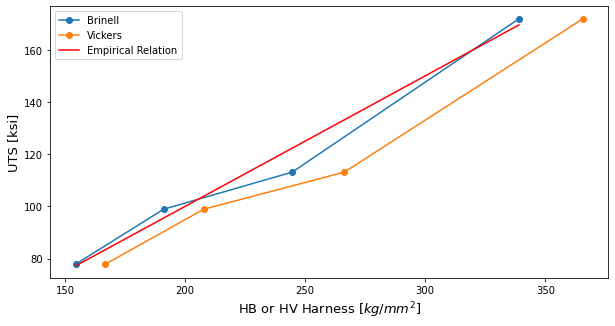

In [107]:
UTS = [780, 682, 537, 1185] # Mpa

UTS = [x/6.895 for x in UTS] # ksi

HB = [244.62, 191.06, 154.47, 338.99]
HV = [266.31, 207.74, 166.84, 365.65]

UTS.sort(); HB.sort(); HV.sort()

plt.figure(figsize = (10,5))

plt.plot(HB, UTS, marker = 'o', label = 'Brinell')
plt.plot(HV, UTS, marker = 'o', label = 'Vickers')

plt.plot(HB, [x/2 for x in HB], c = 'r', label = 'Empirical Relation')

plt.ylabel("UTS [ksi]", fontsize = 13)
plt.xlabel("HB or HV Harness [$kg/mm^2$]", fontsize = 13)

plt.legend()
plt.savefig("/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Mac/2023_Fall/MMAE 419/7.Hardness/figures/relation")